In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Expense_Budget=pd.read_csv("../data/Expense_Budget.csv")
Expense_Budget=Expense_Budget[Expense_Budget.Amount>0]

In [5]:
Expense_Budget.columns


Index(['Service #', 'Service Name', 'Fund #', 'Fund', 'Fund- # & Name',
       'Dept #', 'Dept Name', 'SubDept#', 'SubDept Name', 'Service Area',
       'Type', 'Acct #', 'Acct Name', 'Acct Cat', 'AU All', 'budgetType',
       'Amount', 'Year', 'PerCapita'],
      dtype='object')

In [7]:

Expense_Budget.groupby("Year").Amount.sum()

Year
2013    630983162
2014    605604617
2015    612450372
2016    631441015
2017    644308236
2018    654601089
Name: Amount, dtype: int64

In [27]:
Expense_Budget.groupby(by=["Year","Dept Name"]).Amount.sum().sort_values(ascending =False).loc[2013][0:10]

Dept Name
Guilford County Public Schools - Operating          175630398
Debt Service                                         92010729
Social Services                                      67834829
Law Enforcement                                      63067577
Health Care & Wellness                               37464478
Mental Health                                        36056319
Public Health                                        33420445
Emergency Services                                   25143865
Guilford Technical Community College - Operating     11752690
Human Resources                                      10108269
Name: Amount, dtype: int64

In [44]:
Expense_Budget.groupby(by=["Year","Dept Name"]).Amount.sum().sort_values(ascending =False)

Year  Dept Name                                 
2018  Guilford County Public Schools - Operating    195860398
2017  Guilford County Public Schools - Operating    188360398
2016  Guilford County Public Schools - Operating    183360398
2015  Guilford County Public Schools - Operating    179360398
2014  Guilford County Public Schools - Operating    177130398
2013  Guilford County Public Schools - Operating    175630398
2018  Debt Service                                   99725281
2017  Debt Service                                   93206212
2016  Debt Service                                   92163871
2013  Debt Service                                   92010729
2014  Debt Service                                   91024691
2015  Debt Service                                   90933012
2017  Social Services                                78580101
2016  Social Services                                73270883
2015  Social Services                                70023056
2014  Social Services

In [53]:
Expense_Budget.groupby(by=["Dept Name","Year"]).Amount.sum().sort_values(ascending =True).loc["Guilford County Public Schools - Operating"]

Year
2013    175630398
2014    177130398
2015    179360398
2016    183360398
2017    188360398
2018    195860398
Name: Amount, dtype: int64

In [54]:
Expense_Budget.groupby(by=["Dept Name","Year"]).Amount.sum().sort_values(ascending =True).loc["Debt Service"]

Year
2015    90933012
2014    91024691
2013    92010729
2016    92163871
2017    93206212
2018    99725281
Name: Amount, dtype: int64

In [55]:
Expense_Budget.groupby(by=["Dept Name","Year"]).Amount.sum().sort_values(ascending =True).loc["Social Services"]

Year
2018    64922230
2013    67834829
2014    69153442
2015    70023056
2016    73270883
2017    78580101
Name: Amount, dtype: int64

In [56]:
Expense_Budget.groupby(by=["Dept Name","Year"]).Amount.sum().sort_values(ascending =True).loc["Law Enforcement"]

Year
2014    62514387
2013    63067577
2015    63925042
2016    64878973
2017    65125442
2018    66601596
Name: Amount, dtype: int64

In [57]:
Expense_Budget.groupby(by=["Dept Name","Year"]).Amount.sum().sort_values(ascending =True).loc["Health Care & Wellness"]

Year
2013    37464478
2015    38263174
2016    39114318
2017    40008808
2014    40756263
2018    42493002
Name: Amount, dtype: int64

In [58]:
Expense_Budget.groupby(by=["Dept Name","Year"]).Amount.sum().sort_values(ascending =True).loc["Emergency Services"]

Year
2014    24520231
2013    25143865
2015    25467466
2016    27096095
2017    28529509
2018    29847342
Name: Amount, dtype: int64

In [59]:
a=Expense_Budget.groupby(by=["Dept Name","Year"]).Amount.sum().sort_values(ascending =True).loc["Emergency Services"]
b=Expense_Budget.groupby(by=["Dept Name","Year"]).Amount.sum().sort_values(ascending =True).loc["Health Care & Wellness"]
c=Expense_Budget.groupby(by=["Dept Name","Year"]).Amount.sum().sort_values(ascending =True).loc["Law Enforcement"]
d=Expense_Budget.groupby(by=["Dept Name","Year"]).Amount.sum().sort_values(ascending =True).loc["Social Services"]
e=Expense_Budget.groupby(by=["Dept Name","Year"]).Amount.sum().sort_values(ascending =True).loc["Debt Service"]
f=Expense_Budget.groupby(by=["Dept Name","Year"]).Amount.sum().sort_values(ascending =True).loc["Guilford County Public Schools - Operating"]

a=pd.DataFrame({"Year":a.index,"Emergency Services":a.values})
b=pd.DataFrame({"Year":b.index,"Health Care & Wellness":b.values})
c=pd.DataFrame({"Year":c.index,"Law Enforcement":c.values})
d=pd.DataFrame({"Year":d.index,"Social Services":d.values})
e=pd.DataFrame({"Year":e.index,"Debt Service":e.values})
f=pd.DataFrame({"Year":f.index,"Guilford County Public Schools - Operating":f.values})


In [64]:
g=a.merge([b,c,d,e,f],how="inner",on="Year")

ValueError: can not merge DataFrame with instance of type <class 'list'>

In [66]:
from functools import reduce
dfs=[a,b,c,d,e,f]
df_final = reduce(lambda left,right: pd.merge(left,right,on='Year'), dfs)

In [67]:
df_final

,Emergency Services,Year,Health Care & Wellness,Law Enforcement,Social Services,Debt Service,Guilford County Public Schools - Operating
0,24520231,2014,40756263,62514387,69153442,91024691,177130398
1,25143865,2013,37464478,63067577,67834829,92010729,175630398
2,25467466,2015,38263174,63925042,70023056,90933012,179360398
3,27096095,2016,39114318,64878973,73270883,92163871,183360398
4,28529509,2017,40008808,65125442,78580101,93206212,188360398
5,29847342,2018,42493002,66601596,64922230,99725281,195860398


In [68]:
df_final.set_index("Year",inplace=True)

In [69]:
df_final

,Emergency Services,Health Care & Wellness,Law Enforcement,Social Services,Debt Service,Guilford County Public Schools - Operating
Year,,,,,,
2014,24520231,40756263,62514387,69153442,91024691,177130398
2013,25143865,37464478,63067577,67834829,92010729,175630398
2015,25467466,38263174,63925042,70023056,90933012,179360398
2016,27096095,39114318,64878973,73270883,92163871,183360398
2017,28529509,40008808,65125442,78580101,93206212,188360398
2018,29847342,42493002,66601596,64922230,99725281,195860398


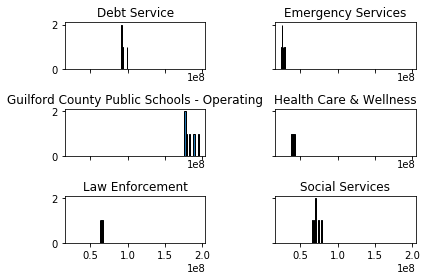

In [70]:
_ = df_final.hist(sharex=True, sharey=True, grid=False, ec='black')
plt.tight_layout()

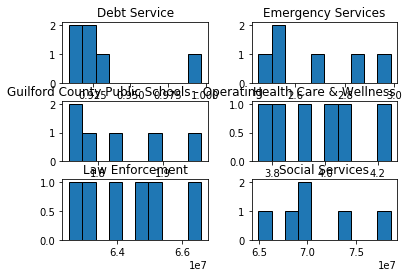

In [75]:
_ = df_final.hist( grid=False,ec='black')
plt.show()

In [77]:
df_final_mean=df_final.mean()
df_final_mean

Emergency Services                            2.676742e+07
Health Care & Wellness                        3.968334e+07
Law Enforcement                               6.435217e+07
Social Services                               7.063076e+07
Debt Service                                  9.317730e+07
Guilford County Public Schools - Operating    1.832837e+08
dtype: float64

In [78]:
df_final_var=df_final.var()
df_final_var

Emergency Services                            4.414915e+12
Health Care & Wellness                        3.283060e+12
Law Enforcement                               2.229090e+12
Social Services                               2.262372e+13
Debt Service                                  1.098707e+13
Guilford County Public Schools - Operating    5.915611e+13
dtype: float64

In [80]:
alpha_mom = df_final_mean ** 2 / df_final_var
beta_mom = df_final_var / df_final_mean

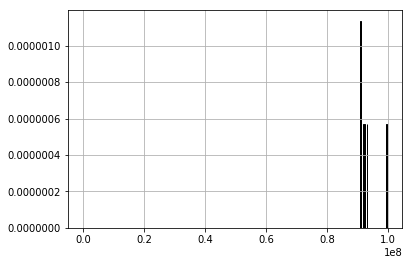

In [95]:
from scipy.stats.distributions import gamma

df_final["Debt Service"].hist(density=True, bins=30, ec='black')
label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[0], beta_mom[0])
plt.annotate(label, xy=(100, .1))
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

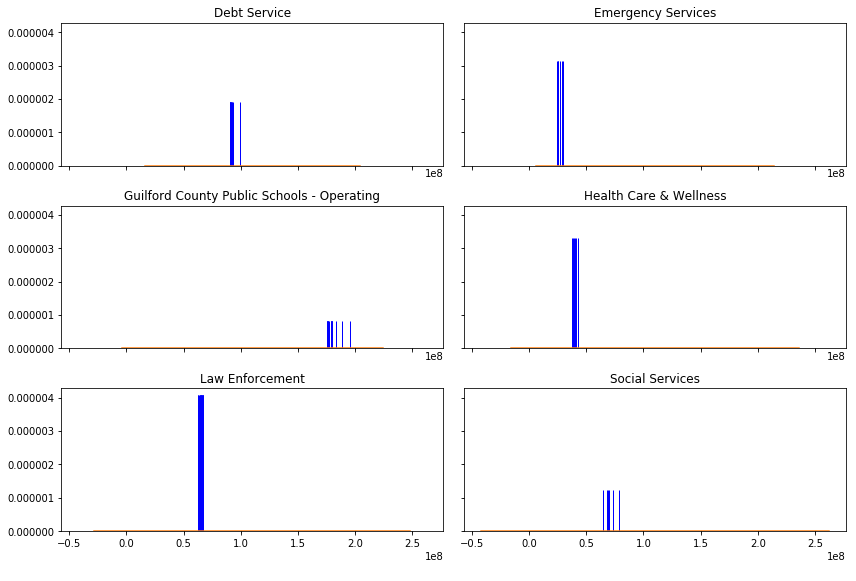

In [96]:
axs = df_final.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=100, grid=False, ec='blue')

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(100, 0.2))
    
plt.tight_layout()

In [35]:
a=(Expense_Budget.groupby(by=["Year","Dept Name"]).Amount.sum().sort_values(ascending =False).loc[2014][0:10])

In [37]:
a.values

array([177130398,  91024691,  69153442,  62514387,  40756263,  31099347,
        24520231,  12397690,   9900000,   9443738], dtype=int64)

In [39]:
b=pd.DataFrame({"Dept":a.index,"Amount":a.values})

In [42]:
b

,Amount,Dept
0,177130398,Guilford County Public Schools - Operating
1,91024691,Debt Service
2,69153442,Social Services
3,62514387,Law Enforcement
4,40756263,Health Care & Wellness
5,31099347,Public Health
6,24520231,Emergency Services
7,12397690,Guilford Technical Community College - Operating
8,9900000,Mental Health
9,9443738,Human Resources


In [34]:
a.columns

Index(['Amount'], dtype='object')

In [ ]:
z=df_final.median()

In [97]:
df_final

,Emergency Services,Health Care & Wellness,Law Enforcement,Social Services,Debt Service,Guilford County Public Schools - Operating
Year,,,,,,
2014,24520231,40756263,62514387,69153442,91024691,177130398
2013,25143865,37464478,63067577,67834829,92010729,175630398
2015,25467466,38263174,63925042,70023056,90933012,179360398
2016,27096095,39114318,64878973,73270883,92163871,183360398
2017,28529509,40008808,65125442,78580101,93206212,188360398
2018,29847342,42493002,66601596,64922230,99725281,195860398


In [98]:
Expense_Budget

,Service #,Service Name,Fund #,Fund,Fund- # & Name,Dept #,Dept Name,SubDept#,SubDept Name,Service Area,Type,Acct #,Acct Name,Acct Cat,AU All,budgetType,Amount,Year,PerCapita
7,125120,IA Energy fellowship Grant,100,General,100-General,125,Internal Audit,10,Internal Audit,General Government,Expense,51200,Retirement,Personnel Expense,125120-51200,adopted,1,2013,0.000002
8,125120,IA Energy fellowship Grant,100,General,100-General,125,Internal Audit,10,Internal Audit,General Government,Expense,51210,F I C A - Social Security,Personnel Expense,125120-51210,adopted,1,2013,0.000002
9,125120,IA Energy fellowship Grant,100,General,100-General,125,Internal Audit,10,Internal Audit,General Government,Expense,51250,Deferred Comp 401K,Personnel Expense,125120-51250,adopted,1,2013,0.000002
10,150210,ROD - High Point,100,General,100-General,150,Register of Deeds,20,High Point,General Government,Expense,51020,Overtime Salaries,Personnel Expense,150210-51020,adopted,1,2013,0.000002
11,125120,IA Energy fellowship Grant,100,General,100-General,125,Internal Audit,10,Internal Audit,General Government,Expense,51230,Workmens Compensation Insurance,Personnel Expense,125120-51230,adopted,2,2013,0.000004
12,210385,High Risk Maternity Clinic,100,General,100-General,210,Public Health,30,Clinical Health,Human Services,Expense,51020,Overtime Salaries,Personnel Expense,210385-51020,adopted,4,2013,0.000008
13,125120,IA Energy fellowship Grant,100,General,100-General,125,Internal Audit,10,Internal Audit,General Government,Expense,51020,Overtime Salaries,Personnel Expense,125120-51020,adopted,7,2013,0.000014
14,210170,Community Alternatives Program,100,General,100-General,210,Public Health,10,Community Health,Human Services,Expense,51020,Overtime Salaries,Personnel Expense,210170-51020,adopted,7,2013,0.000014
15,210625,Medication Assistance Progm 2,100,General,100-General,210,Public Health,60,Allied Health,Human Services,Expense,51020,Overtime Salaries,Personnel Expense,210625-51020,adopted,7,2013,0.000014
16,310120,LP-Civil Proc-Warrant Repostry,100,General,100-General,310,Law Enforcement,10,Legal Process,Public Safety,Expense,51020,Overtime Salaries,Personnel Expense,310120-51020,adopted,7,2013,0.000014


In [99]:
a=Expense_Budget[Expense_Budget["Dept Name"]=="Emergency Services"]

In [100]:
a.head()

,Service #,Service Name,Fund #,Fund,Fund- # & Name,Dept #,Dept Name,SubDept#,SubDept Name,Service Area,Type,Acct #,Acct Name,Acct Cat,AU All,budgetType,Amount,Year,PerCapita
62,320610,Environmental,100,General,100-General,320,Emergency Services,60,Environmental,Public Safety,Expense,51250,Deferred Comp 401K,Personnel Expense,320610-51250,adopted,52,2013,0.000104
71,320610,Environmental,100,General,100-General,320,Emergency Services,60,Environmental,Public Safety,Expense,51200,Retirement,Personnel Expense,320610-51200,adopted,70,2013,0.000139
240,320310,Emergency Services Garage,100,General,100-General,320,Emergency Services,30,Garage,Public Safety,Expense,53100,Routine Building Maintenance/Repair,Other Services & Charges,320310-53100,adopted,210,2013,0.000418
328,320510,Fire Administration,100,General,100-General,320,Emergency Services,50,Fire,Public Safety,Expense,52090,Laboratory Supplies,Supplies & Materials,320510-52090,adopted,300,2013,0.000598
329,320610,Environmental,100,General,100-General,320,Emergency Services,60,Environmental,Public Safety,Expense,53170,Dues and Memberships,Other Services & Charges,320610-53170,adopted,300,2013,0.000598


In [102]:
a["Fund #"].value_counts()

100    1083
Name: Fund #, dtype: int64

In [104]:
a["Service #"].value_counts()

320410    236
320002    177
320510    169
320110    149
320310    146
320520    136
320210     41
320610     17
320220      6
320211      6
Name: Service #, dtype: int64

[Text(0,0.5,'Probability'), Text(0.5,0,'Amount')]

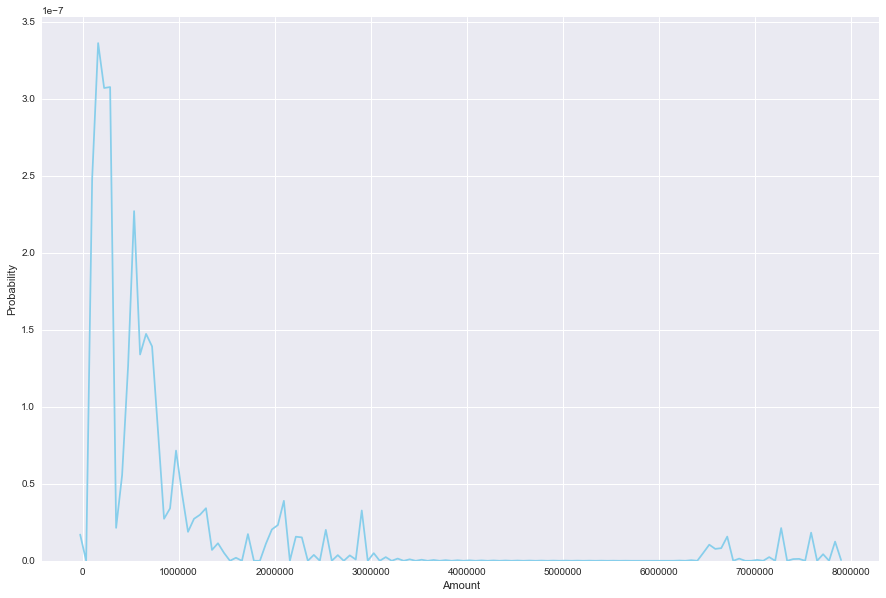

In [111]:
import seaborn as sns
sns.set(color_codes=True)
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.distplot(a.Amount,
                  kde=True,
                  hist=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Amount', ylabel='Probability')

[Text(0,0.5,'Frequency'), Text(0.5,0,'Amount')]

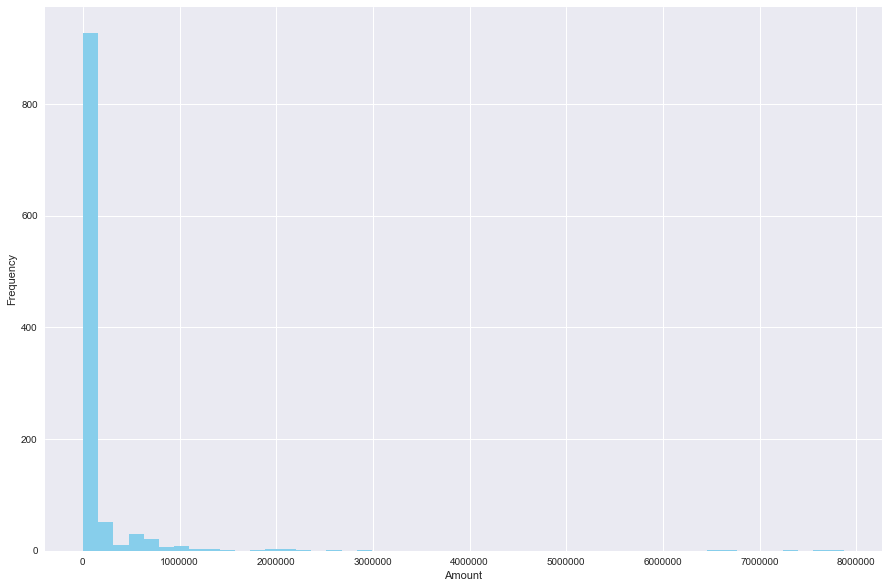

In [108]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.distplot(a.Amount,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Amount', ylabel='Frequency')

In [112]:
b=Expense_Budget[Expense_Budget["Dept Name"]=="Health Care & Wellness"]

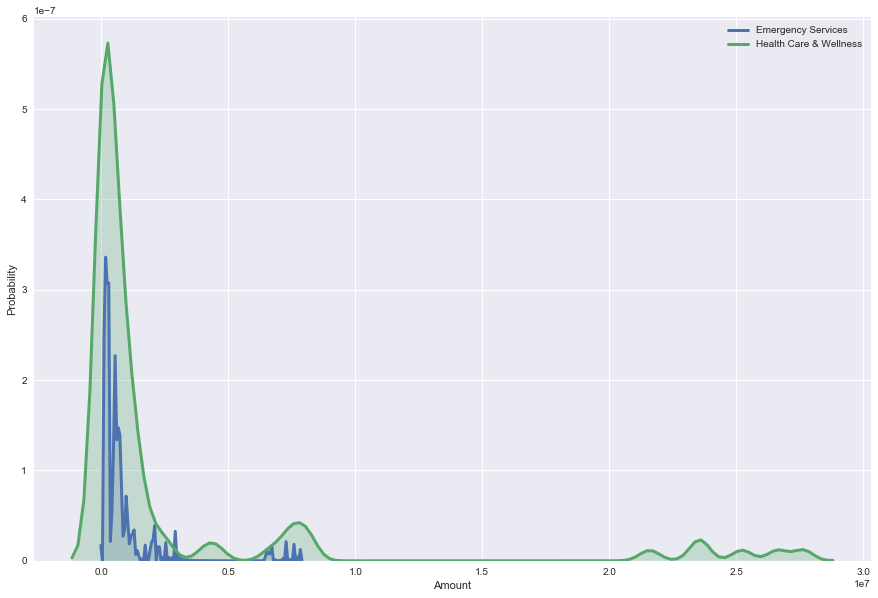

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(a.Amount, hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             hist_kws={"linewidth": 15,'alpha':1},
             label = 'Emergency Services')
sns.distplot(b.Amount, hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             hist_kws={"linewidth": 15,'alpha':1},
             label="Health Care & Wellness"
             )
# plt.set_label(xlabel='Amount', ylabel='Probability')
plt.xlabel("Amount")
plt.ylabel("Probability")
# plt.xlim(1.0)
plt.show()

In [267]:
high=["Guilford County Public Schools - Operating","Debt Service","Social Services","Law Enforcement","Health Care & Wellness"]
low=["Veteran Services","Soil & Water Conservation","Purchasing","Clerk to the Board","Family Justice Center"]

In [247]:
[Expense_Budget["Dept Name"]==i for i in high]

AttributeError: 'list' object has no attribute 'tolist'

In [245]:
Expense_Budget[Expense_Budget["Dept Name"]==i for i in high].groupby(by=["Year","Dept Name"])["Amount"].sum().sort_values(ascending = False)

SyntaxError: invalid syntax (<ipython-input-245-d11df6ab172e>, line 1)

In [286]:
top=[Expense_Budget[Expense_Budget["Dept Name"]==i].groupby(by=["Year","Dept Name"])["Amount"].sum() for i in high]

In [287]:
top_1=[]
[top_1.extend(i.values) for i in top]
# top_1

[None, None, None, None, None]

In [288]:
low_1=[Expense_Budget[Expense_Budget["Dept Name"]==i].groupby(by=["Year","Dept Name"])["Amount"].sum() for i in low]
low_2=[]
[low_2.extend(i.values) for i in low_1]

[None, None, None, None, None]

In [289]:
Expense_Budget.groupby(by=["Year","Dept Name"])["Amount"].sum().sort_values(ascending = False)

Year  Dept Name                                 
2018  Guilford County Public Schools - Operating    195860398
2017  Guilford County Public Schools - Operating    188360398
2016  Guilford County Public Schools - Operating    183360398
2015  Guilford County Public Schools - Operating    179360398
2014  Guilford County Public Schools - Operating    177130398
2013  Guilford County Public Schools - Operating    175630398
2018  Debt Service                                   99725281
2017  Debt Service                                   93206212
2016  Debt Service                                   92163871
2013  Debt Service                                   92010729
2014  Debt Service                                   91024691
2015  Debt Service                                   90933012
2017  Social Services                                78580101
2016  Social Services                                73270883
2015  Social Services                                70023056
2014  Social Services

In [229]:
least=Expense_Budget[Expense_Budget["Dept Name"]=="Veteran Services"].groupby(by=["Year","Dept Name"])["Amount"].mean().sort_values(ascending = False)

In [230]:
maxm=Expense_Budget[Expense_Budget["Dept Name"]=="Guilford County Public Schools - Operating"].groupby(by=["Year","Dept Name"])["Amount"].mean().sort_values(ascending = False)

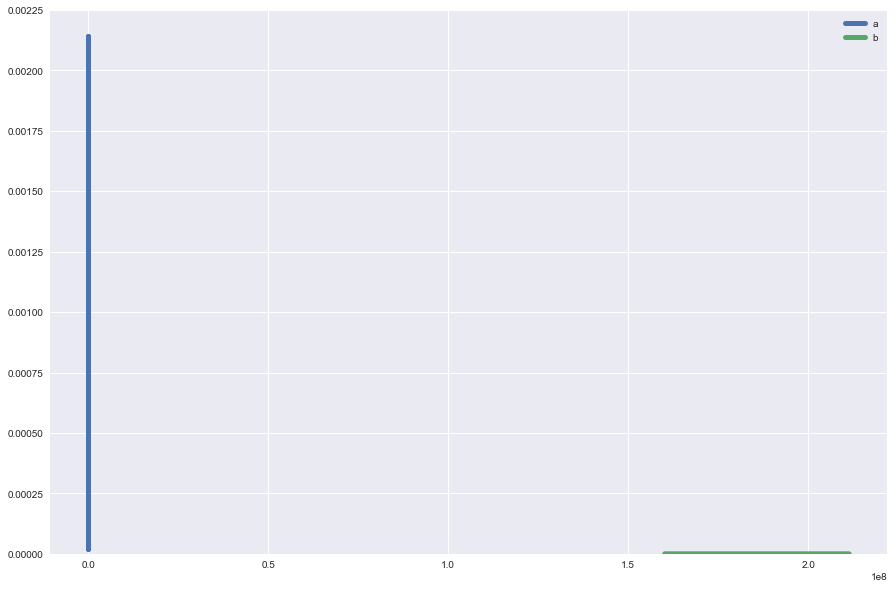

In [231]:
sns.distplot(least.values, hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 5},
             hist_kws={"linewidth": 15,'alpha':1},
             label = 'a')
sns.distplot(maxm.values, hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 5},
             hist_kws={"linewidth": 15,'alpha':1},
             label="b"
             )
# sns.set(xlabel='Amount', ylabel='Probability')
plt.show()

[Text(0,0.5,'Probability'), Text(0.5,0,'Amount')]

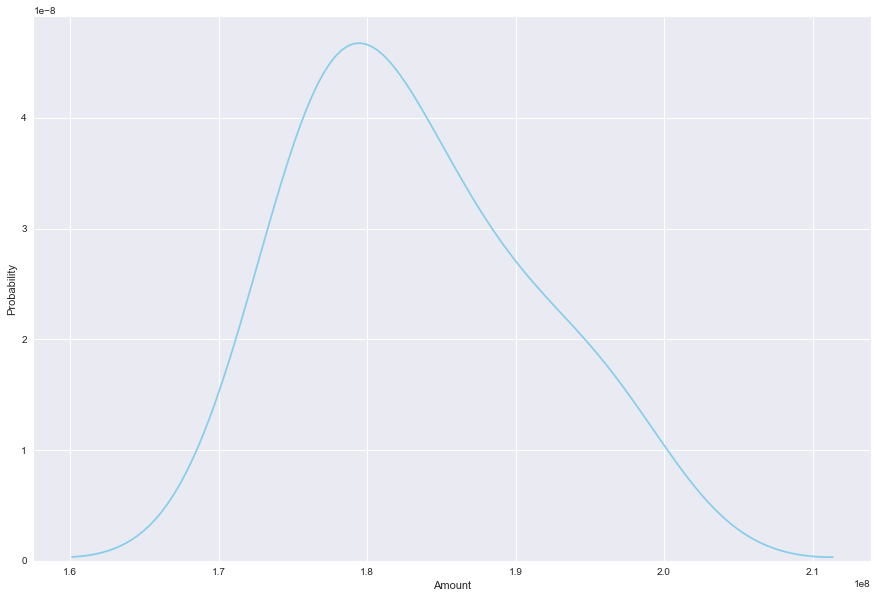

In [153]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.distplot(maxm.values,
                  kde=True,
                  hist=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Amount', ylabel='Probability')

In [188]:
least.values

array([127273, 124772, 122177, 121372], dtype=int64)

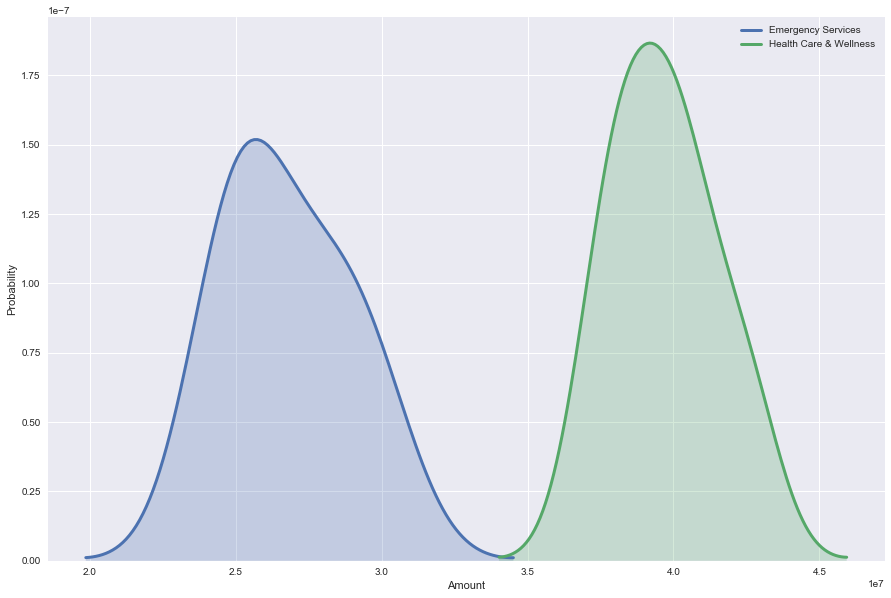

In [285]:
sns.distplot(a.groupby("Year").Amount.sum(), hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             hist_kws={"linewidth": 15,'alpha':1},
             label = 'Emergency Services')
sns.distplot(b.groupby("Year").Amount.sum(), hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 3},
             hist_kws={"linewidth": 15,'alpha':1},
             label="Health Care & Wellness"
             )
# plt.set_label(xlabel='Amount', ylabel='Probability')
plt.xlabel("Amount")
plt.ylabel("Probability")
# plt.xlim(1.0)
plt.show()

[Text(0,0.5,'Probability'), Text(0.5,0,'Amount')]

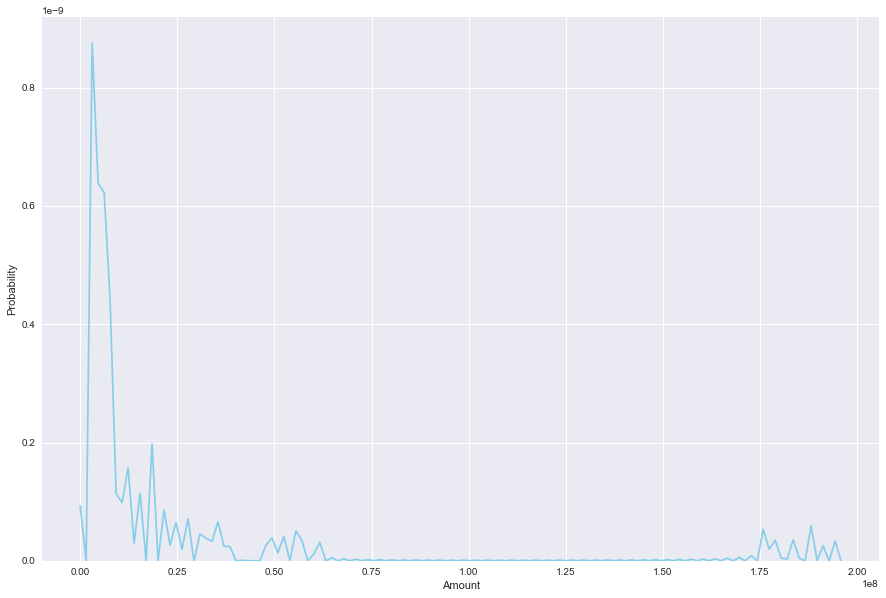

In [194]:
ax = sns.distplot(Expense_Budget.Amount,
                  kde=True,
                  hist=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Amount', ylabel='Probability')

[Text(0,0.5,'Frequency'), Text(0.5,0,'Normal')]

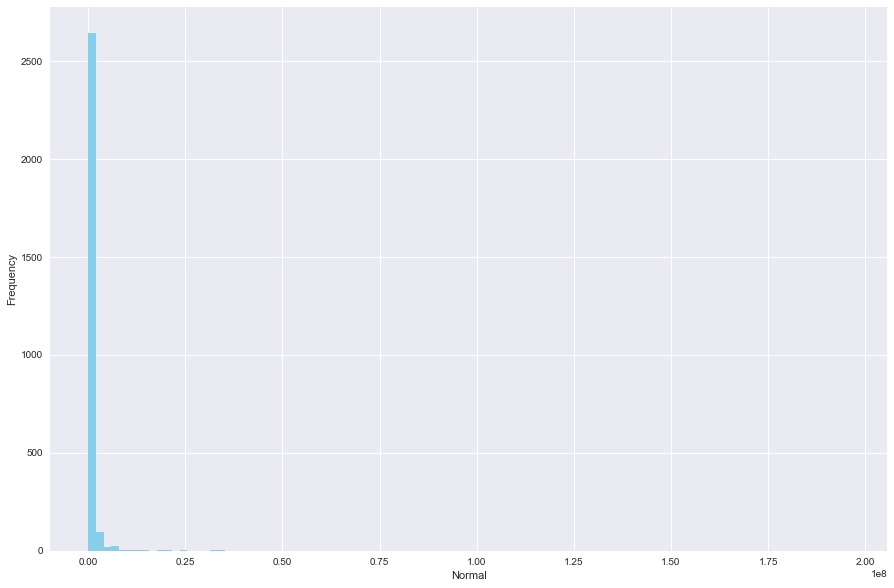

In [213]:
## check type of distribution
ax = sns.distplot(Expense_Budget_1.Amount,
                  bins=100,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal', ylabel='Frequency')


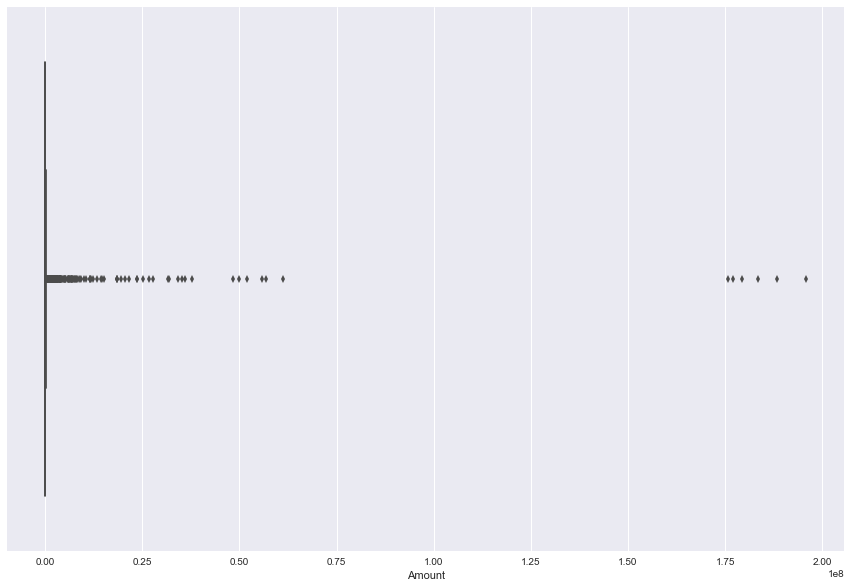

In [196]:
### Box plot for Amount 
import seaborn as sns
sns.boxplot(x=Expense_Budget.Amount)

In [204]:
Q1 = Expense_Budget.Amount.quantile(0.25)
Q3 = Expense_Budget.Amount.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

31684.0


In [250]:
Expense_Budget_1 = Expense_Budget[((Expense_Budget.Amount > (Q1 - 1.5 * IQR)) | (Expense_Budget.Amount < (Q3 + 1.5 * IQR)))]

In [203]:
(Q1 - 1.5 * IQR)

Service #    59650.00000
Fund #         100.00000
Dept #          60.00000
SubDept#       -20.00000
Acct #       48435.00000
Amount      -46467.00000
Year          2009.50000
PerCapita       -0.09021
dtype: float64

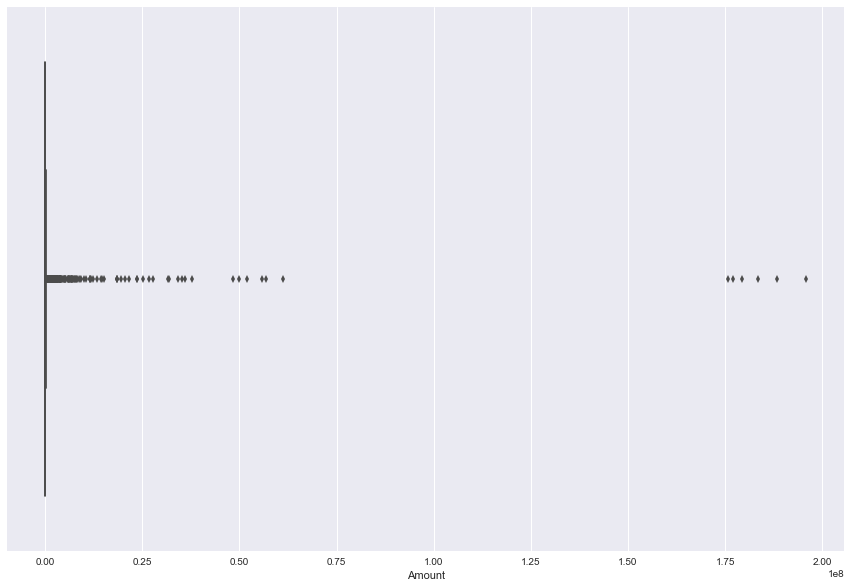

In [251]:
import seaborn as sns
sns.boxplot(x=Expense_Budget_1.Amount)

In [217]:
Expense_Budget.Amount.mean()-3*Expense_Budget.Amount.std()

-10668164.055939877

In [222]:
Expense_Budget_2 = Expense_Budget[((Expense_Budget.Amount > (Expense_Budget.Amount.mean()-1*Expense_Budget.Amount.std())) | (Expense_Budget.Amount < (Expense_Budget.Amount.mean()+1*Expense_Budget.Amount.std())))]

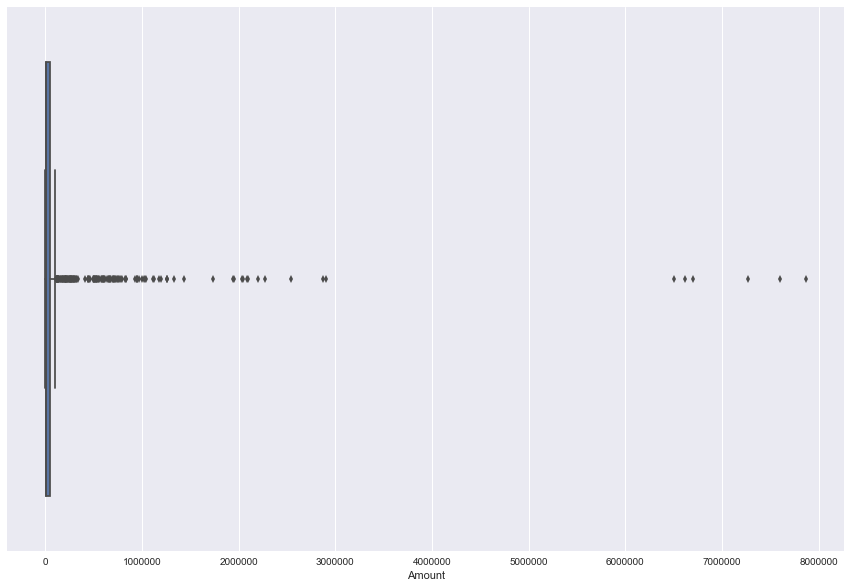

In [228]:
import seaborn as sns
sns.boxplot(x=.Amount)

In [249]:
maxm

Year  Dept Name                                 
2018  Guilford County Public Schools - Operating    195860398
2017  Guilford County Public Schools - Operating    188360398
2016  Guilford County Public Schools - Operating    183360398
2015  Guilford County Public Schools - Operating    179360398
2014  Guilford County Public Schools - Operating    177130398
2013  Guilford County Public Schools - Operating    175630398
Name: Amount, dtype: int64

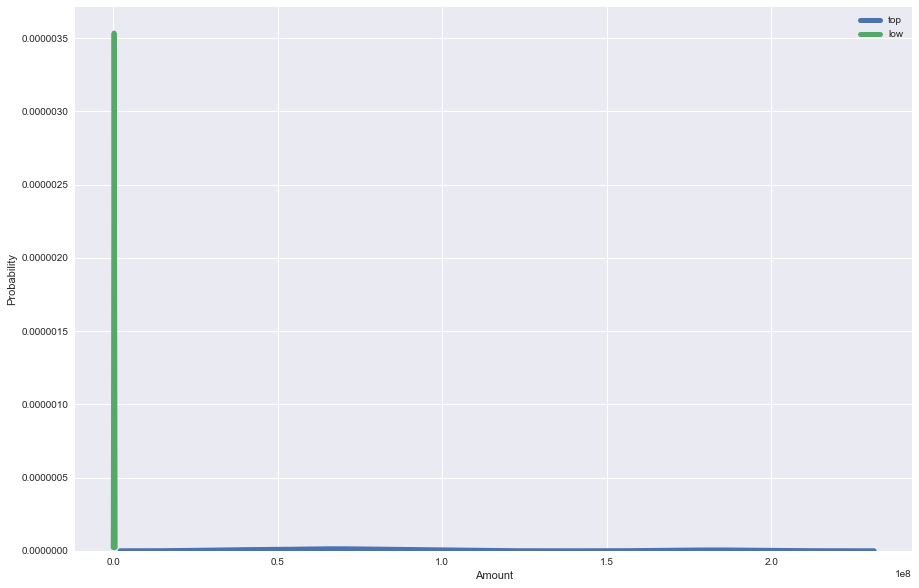

In [290]:
sns.distplot(top_1, hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 5},
             hist_kws={"linewidth": 15,'alpha':1},
             label = 'top')
sns.distplot(low_2, hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 5},
             hist_kws={"linewidth": 15,'alpha':1},
             label="low"
             )
# sns.set(xlabel='Amount', ylabel='Probability')
plt.xlabel("Amount")
plt.ylabel("Probability")
plt.show()

In [270]:
top_1

[195860398,
 188360398,
 183360398,
 179360398,
 177130398,
 175630398,
 99725281,
 93206212,
 92163871,
 92010729,
 91024691,
 90933012,
 78580101,
 73270883,
 70023056,
 69153442,
 67834829,
 64922230,
 66601596,
 65125442,
 64878973,
 63925042,
 63067577,
 62514387,
 42493002,
 40756263,
 40008808,
 39114318,
 38263174,
 37464478]

In [271]:
low_2

[127273,
 124772,
 122177,
 121372,
 285461,
 259959,
 257494,
 245859,
 245165,
 400959,
 399036,
 394462,
 388429,
 351774,
 343223,
 305477,
 260868,
 207020,
 205886,
 197273,
 169882,
 380126,
 277312,
 231551]

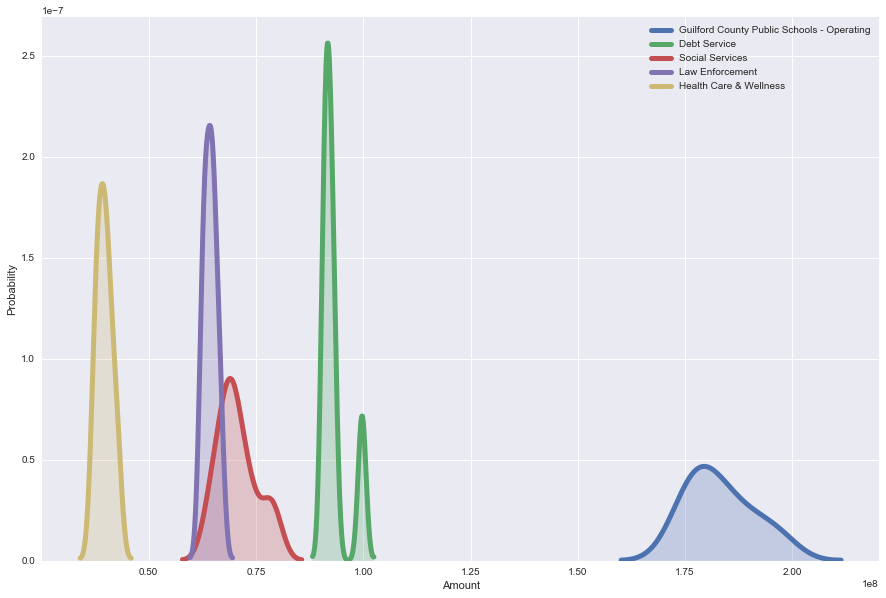

In [308]:
for i in top:
    sns.distplot(i, hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 5},
             hist_kws={"linewidth": 15,'alpha':1},
             label=i.index[1][1]
             )
# sns.set(xlabel='Amount', ylabel='Probability')
plt.xlabel("Amount")
plt.ylabel("Probability")
plt.show()
    

In [282]:
top[0].index[0:1,0:1]

IndexError: too many indices for array

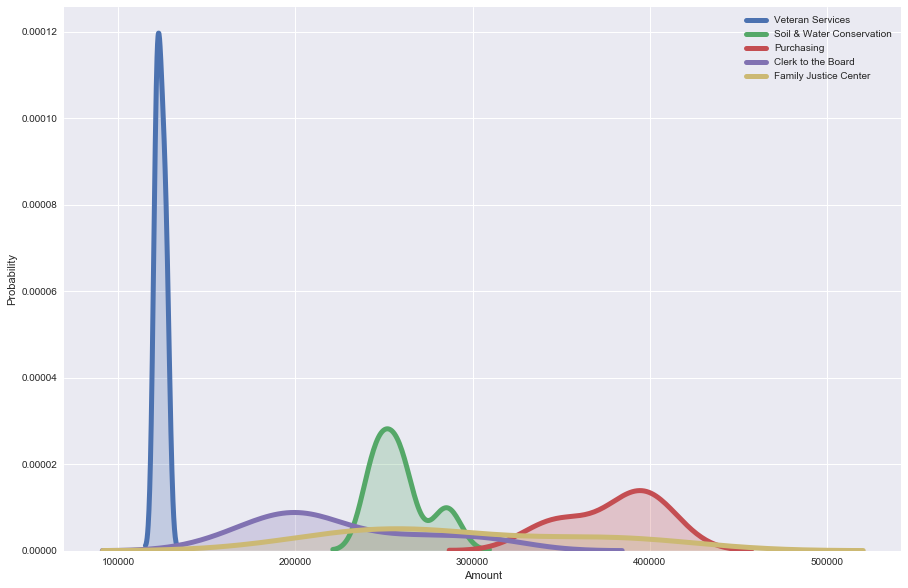

In [323]:
for i in low_1:
    sns.distplot(i, hist = False,
             kde = True,
             kde_kws = {'shade': True, 'linewidth': 5},
             hist_kws={"linewidth": 15,'alpha':1},
             label=i.index[1][1]
             )
# sns.set(xlabel='Amount', ylabel='Probability')
plt.xlabel("Amount")
plt.ylabel("Probability")
plt.show()

In [306]:
low_1[1].index[1][1]

'Soil & Water Conservation'

In [337]:
a.groupby("Year").Amount.sum()
b.groupby("Year").Amount.sum()
dd=pd.DataFrame({"a":a.groupby("Year").Amount.sum(),"b":b.groupby("Year").Amount.sum()})

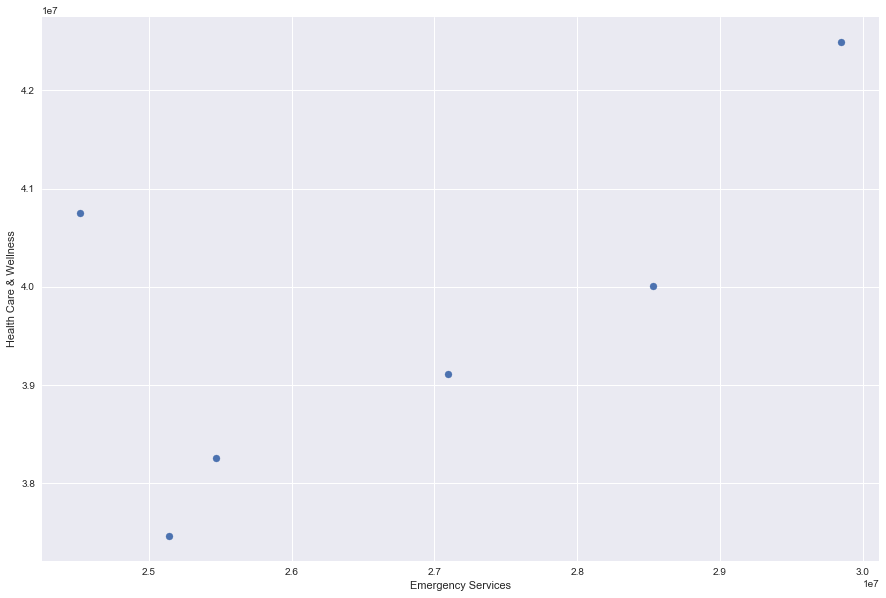

In [339]:
dd.corr()
plt.scatter(dd["a"],dd["b"])
plt.xlabel("Emergency Services")
plt.ylabel("Health Care & Wellness")
plt.show()

In [331]:
dd=pd.DataFrame({"Guilford County Public Schools - Operating":top[0].values,"Debt Service":top[1].values,"Social Services":top[2].values,"Law Enforcement":top[3].values,"Health Care & Wellness ":top[4].values})

In [332]:
dd.corr()

,Debt Service,Guilford County Public Schools - Operating,Health Care & Wellness,Law Enforcement,Social Services
Debt Service,1.000000,0.889614,0.747588,0.833763,-0.406183
Guilford County Public Schools - Operating,0.889614,1.000000,0.759129,0.959173,0.008950
Health Care & Wellness,0.747588,0.759129,1.000000,0.573495,-0.219818
Law Enforcement,0.833763,0.959173,0.573495,1.000000,0.035573
Social Services,-0.406183,0.008950,-0.219818,0.035573,1.000000


In [335]:
ddd=pd.DataFrame({"Guilford County Public Schools - Operating":low_1[0].values,"Debt Service":low_1[1].values,"Social Services":low_1[2].values,"Law Enforcement":low_1[3].values,"Health Care & Wellness ":low_1[3].values})

ValueError: arrays must all be same length

In [328]:
top[4]

Year  Dept Name             
2013  Health Care & Wellness    37464478
2014  Health Care & Wellness    40756263
2015  Health Care & Wellness    38263174
2016  Health Care & Wellness    39114318
2017  Health Care & Wellness    40008808
2018  Health Care & Wellness    42493002
Name: Amount, dtype: int64